<a href="https://colab.research.google.com/github/aajibabudhangar/restaurant-data-analysis/blob/main/cognifyTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv("dataset1.csv")

1.check rows and columns

In [16]:
print(df.shape)
print(df.columns)

(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


2.check for missing values

In [17]:
print(df.isnull().sum())
df=df.dropna()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


3.Data type conversion

In [18]:
df['Aggregate rating']=df['Aggregate rating'].astype(float)

4.analyze distribution of target variables

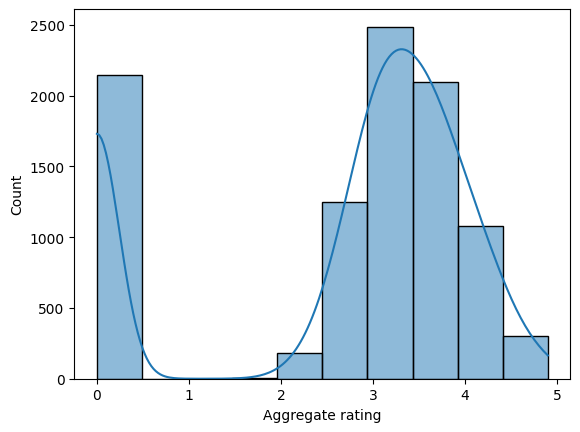

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Aggregate rating'],bins=10,kde=True)
plt.show()

5.check for class imbalance

In [ ]:
print(df['Aggregate rating'].value_counts())

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


Task 2:Descriptive analysis
1.Basic statistics

In [20]:
print(df.describe())

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.542000e+03   9542.000000  9542.000000  9542.000000   
mean    9.043301e+06     18.179208    64.274997    25.848532   
std     8.791967e+06     56.451600    41.197602    11.010094   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019312e+05      1.000000    77.081565    28.478658   
50%     6.002726e+06      1.000000    77.192031    28.570444   
75%     1.835260e+07      1.000000    77.282043    28.642711   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9542.000000  9542.000000       9542.000000   9542.000000  
mean            1200.326137     1.804968          2.665238    156.772060  
std            16128.743876     0.905563          1.516588    430.203324  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

2.categorical variable distribution

In [21]:
print(df['Country Code'].value_counts())
print(df['City'].value_counts())
print(df['Cuisines'].value_counts())

Country Code
1      8652
216     425
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64
City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
             ... 
Inverloch       1
Mohali          1
Panchkula       1
Bandung         1
Randburg        1
Name: count, Length: 140, dtype: int64
Cuisines
North Indian                          936
North Indian, Chinese                 511
Chinese                               354
Fast Food                             354
North Indian, Mughlai                 334
                                     ... 
World Cuisine, Patisserie, Cafe         1
Burger, Izgara                          1
Desserts, B�_rek                        1
Restaurant Cafe, Turkish, Desserts      1
Restaurant Cafe, Desserts               1
Name: count, Length: 1825, dtype: int64


3. identify tio cuisines and cities

In [22]:
top_cuisines=df['Cuisines'].value_counts().head(10)
print(top_cuisines)
top_cities=df['City'].value_counts().head(10)
print(top_cities)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Ahmedabad         21
Lucknow           21
Guwahati          21
Amritsar          21
Name: count, dtype: int64


4. visualize

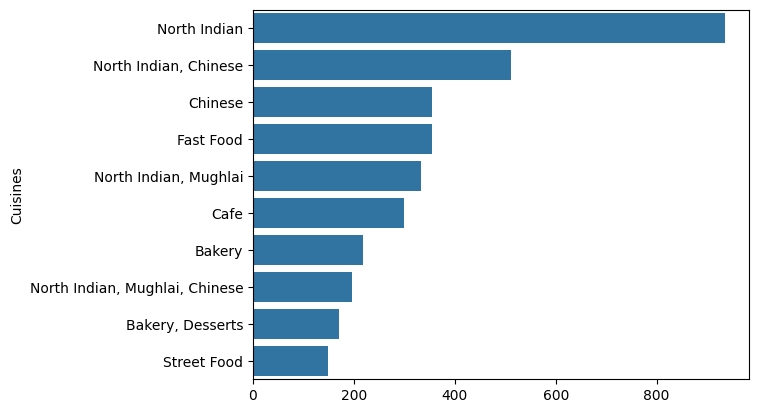

In [23]:
sns.barplot(x=top_cuisines.values,y=top_cuisines.index)
plt.show()


Task 3:Geospatial Analysis
1.plot retuarant locations

In [24]:
import plotly.express as px
fig=px.scatter_mapbox(df,lat="Latitude",lon="Longitude",hover_name="Restaurant Name", mapbox_style="open-street-map",zoom=1)
fig.show()

2.distribution across cities/countries

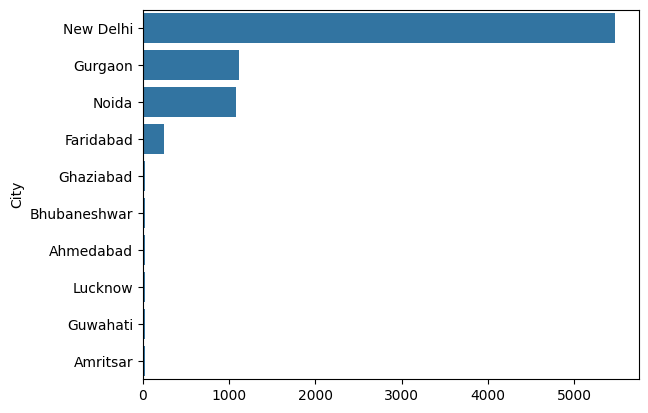

In [25]:
city_distribution = df['City'].value_counts().head(10)
sns.barplot(x=city_distribution.values, y=city_distribution.index)
plt.show()


3.check correlation between location and rating

                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.045415          0.000197
Longitude         0.045415   1.000000         -0.114733
Aggregate rating  0.000197  -0.114733          1.000000


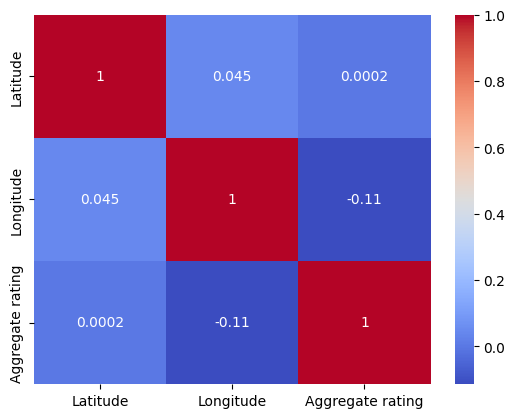

In [26]:
corr = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print(corr)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


level 2


task 1:Percentage of restaurants with booking & delivery

In [28]:
import pandas as pd
df=pd.read_csv("dataset1.csv")
df['Has Table booking'].value_counts(normalize=True) * 100
df['Has Online delivery'].value_counts(normalize=True) * 100


,proportion
Has Online delivery,
No,74.337766
Yes,25.662234


2.Compare ratings

In [29]:
table_booking_ratings = df.groupby('Has Table booking')['Aggregate rating'].mean()
print(table_booking_ratings)

online_delivery_ratings = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print(online_delivery_ratings)


Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


3. Visualize

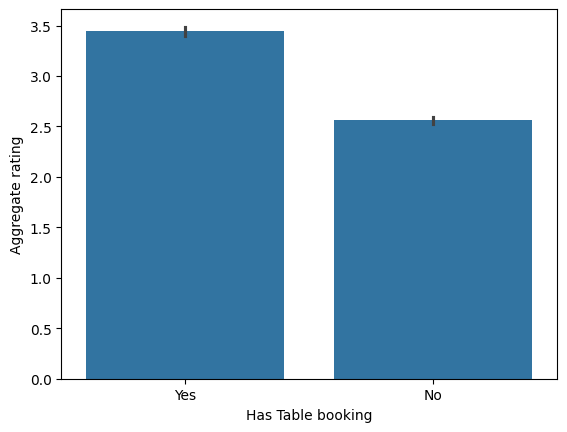

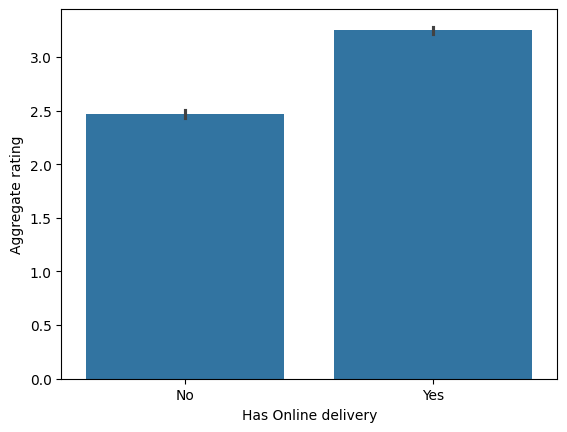

In [30]:
sns.barplot(x='Has Table booking', y='Aggregate rating', data=df)
plt.show()

sns.barplot(x='Has Online delivery', y='Aggregate rating', data=df)
plt.show()


Task 2: Price Range Analysis
1.Most common price range analysis

In [31]:
df['Price range'].value_counts()


,count
Price range,
1,4444
2,3113
3,1408
4,586


2. average rating for each price range

In [33]:
df.groupby('Price range')['Aggregate rating'].mean()

,Aggregate rating
Price range,
1,1.999887
2,2.941054
3,3.683381
4,3.817918


3. Find the best price range

In [34]:
best_price_range=df.groupby('Price range')['Aggregate rating'].mean().idxmax()
print("Best price range:",best_price_range)

Best price range: 4


4.visualize

<Axes: xlabel='Price range', ylabel='Aggregate rating'>

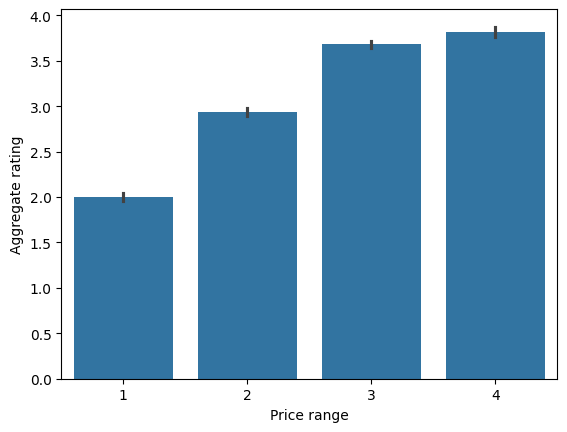

In [35]:
sns.barplot(x='Price range', y='Aggregate rating', data=df)


Task 3: Feature Engineering
1. Extract new features

In [38]:
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})


2. check correlations

In [39]:
df[['Restaurant Name Length', 'Address Length', 'Aggregate rating']].corr()


,Restaurant Name Length,Address Length,Aggregate rating
Restaurant Name Length,1.000000,0.009567,-0.035178
Address Length,0.009567,1.000000,0.002334
Aggregate rating,-0.035178,0.002334,1.000000


LEVEL 3
Task 1: Predective Modeling
1. select features and target

In [40]:
X = df[['Price range', 'Has Table booking', 'Has Online delivery']]
y = df['Aggregate rating']


2. Train test and split

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. Try models

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name, "R2:", r2_score(y_test, y_pred), "MSE:", mean_squared_error(y_test, y_pred))


Linear R2: 0.23459427586630932 MSE: 1.7421468499350339
DecisionTree R2: 0.2595513514163822 MSE: 1.68534182590368
RandomForest R2: 0.2596445769824759 MSE: 1.6851296343545674
